##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



#Intro to Voter Registration
The purpose of this project is to determine why there has been a decrease in voter registration despite **initially high levels of enthusiasm** for the 2020 elections. Our goal is to figure out if the year **2020** when **COVID-19** hit had any correlation to the drop off in voter registration. This notebook will provide charts and statistics that will help visualize if there was a significant change in voter registration from **2016** to **2020**

**Question 1**: Did the overall amount of voter registration decrease significantly from 2016 to 2020?

**Question 2**: Is there any significant change or trend in voter registration between **California** and **Texas** during the year of 2020 in comparison to 2016?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [3]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


**Jusrisdiction** = The region/place in which the data was collected

**Year** = The time in which the data w as collected

**Month** = Out of the 12 months in a year, which month was the data collected

**New Registered Voters** = The amount of people who became newly registered voters

Check for any missing data data. (1 point)

In [4]:
voters.isna()

,Jurisdiction,Year,Month,New registered voters
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
101,False,False,False,False
102,False,False,False,False
103,False,False,False,False
104,False,False,False,False


Check your data types. (1 point)

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [5]:
voters = voters.rename(columns = {"Jurisdiction":"NAME"})
voters = voters.rename(columns = {"New registered voters":"registered_voters"})
voters.head()

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Explain any potential limitations to your data (2 points)

There is a limited amount of **States** that are represented in the data set that we were given. Along with the limited number of months that data was collected, specifically it did not record data for **November**, the month in which the elections actually took place.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [6]:
voters.loc[voters['registered_voters'] == voters.registered_voters.max()].head()

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The highest amount of new voters is 238281

What is the average voter registration? (1 points)

In [7]:
average = round(voters["registered_voters"].mean())
print(average)

48223


The average voter registration is 482223


*Create* a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [8]:
average = round(voters["registered_voters"].mean())
voters["high_voters"] = voters["registered_voters"] > average
voters.value_counts("high_voters")

,count
high_voters,
False,70
True,36


36 times was the voter registration higher than the above average

How many times did each state go above the national average for new voter registration? (2 points)



In [9]:
national_avg = voters["registered_voters"].mean()
voters[voters["registered_voters"] > national_avg].groupby("NAME")["registered_voters"].count()


,registered_voters
NAME,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


Arizona went 5 times above national average for voter registration, California 7, Florida 7, Georgia 1, Illionis 4, North Carolina 6, Texas 8

Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [10]:
highest_avg = voters[voters["registered_voters"] > national_avg].groupby("NAME")["registered_voters"]
highest_avg.mean().sort_values(ascending = False).head(3)

,registered_voters
NAME,
California,159627.571429
Texas,134466.125000
Illinois,74252.250000


California, Texas, Illinois have the highest average registration overall.

##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

<ipython-input-11-82cb36658631>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = total_voters, x = "NAME", y = "registered_voters", palette = "pastel")


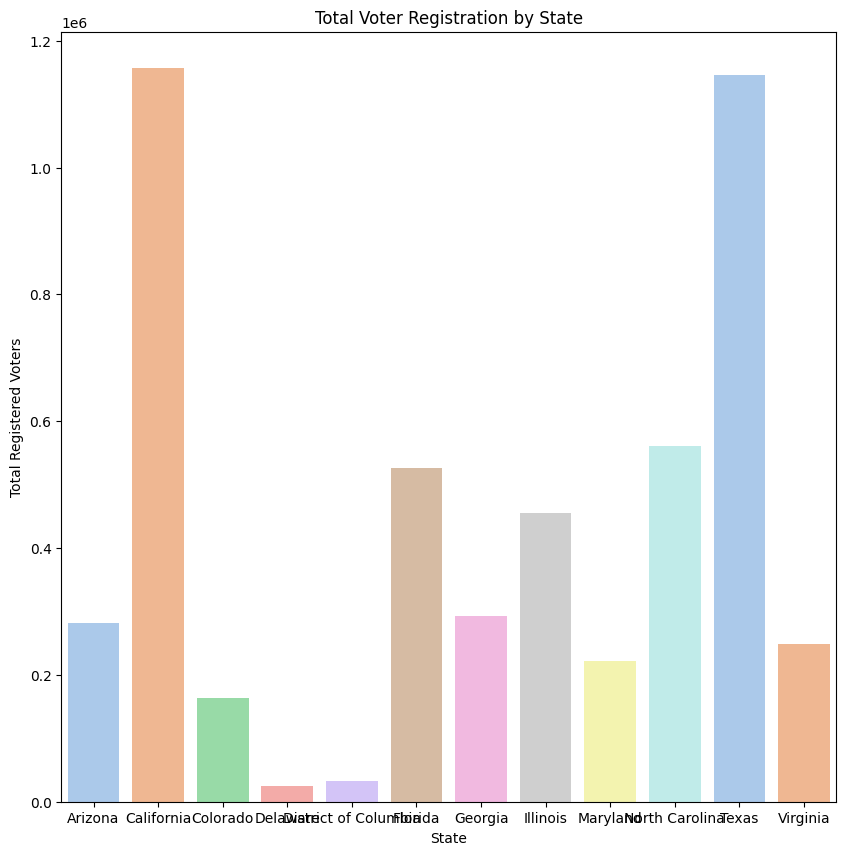

In [11]:
total_voters = voters.groupby("NAME")["registered_voters"].sum().reset_index()
plt.figure(figsize = (10,10))
sns.barplot(data = total_voters, x = "NAME", y = "registered_voters", palette = "pastel")

plt.title("Total Voter Registration by State")
plt.xlabel("State")
plt.ylabel("Total Registered Voters")
plt.show()
#Smaller states have lower registration numbers, States with higher populations like California and Texas have higher voter registration

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

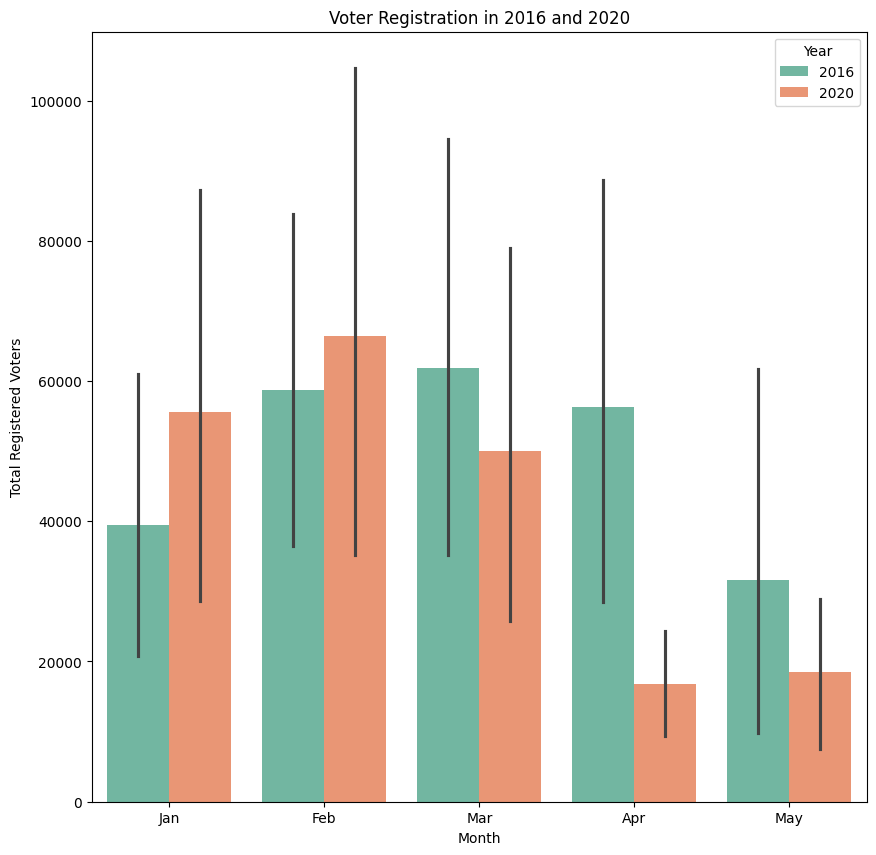

In [19]:
plt.figure(figsize = (10,10))
sns.barplot(voters,x = 'Month', y = 'registered_voters', hue = "Year", palette = "Set2" )
plt.title("Voter Registration in 2016 and 2020")
plt.xlabel("Month")
plt.ylabel("Total Registered Voters")
plt.show()

2020 had higher voter registration than 2016 in most months, very low registration in April and May.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

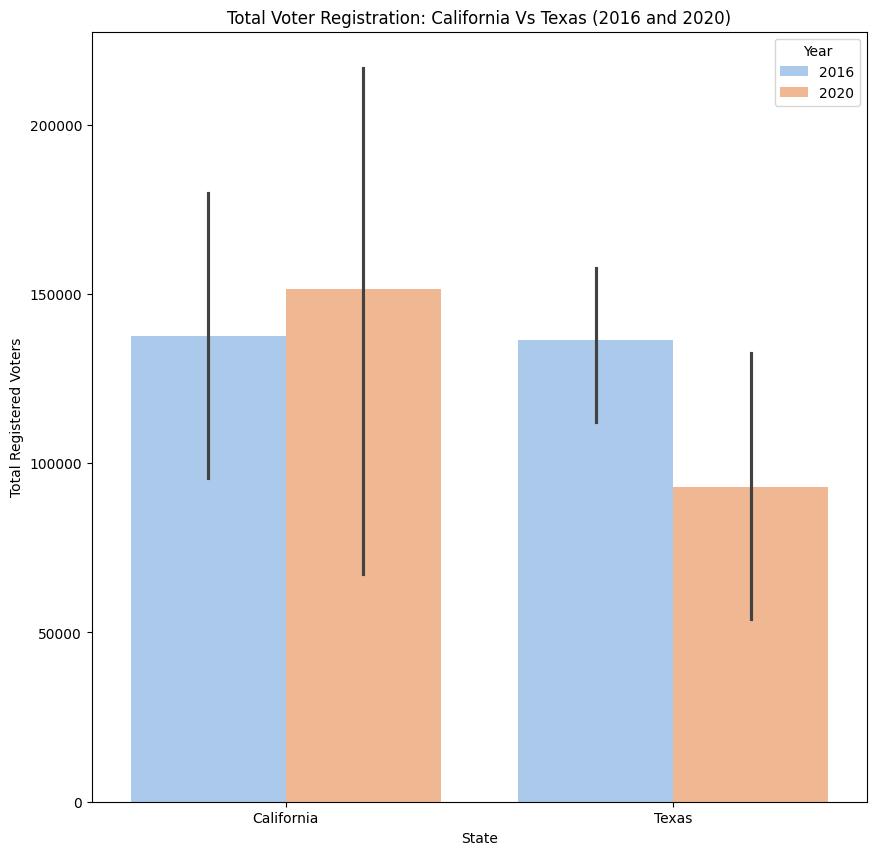

In [22]:
voters_CATX = voters[voters["NAME"].isin(["California", "Texas"])]
plt.figure(figsize = (10,10))
sns.barplot(data = voters_CATX, x = "NAME", y = "registered_voters", palette = "pastel", hue = "Year")

plt.title("Total Voter Registration: California Vs Texas (2016 and 2020)")
plt.xlabel("State")
plt.ylabel("Total Registered Voters")
plt.show()
#California saw higher registration in 2020 compared to 2016 meanwhile Texas saw higher registration in 2016 compared to 2020

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [25]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)
states.head()

fatal: destination path '325-Datasets' already exists and is not an empty directory.


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."




```
# This is formatted as code
```

Set our continental US bounding box to us for the next questions. (2 points)

In [28]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]


Create a dataframe that shows the average voter registration per state. (2 points)

In [29]:
avg_voter_reg = voters.groupby("NAME")["registered_voters"].mean().reset_index()
avg_voter_reg.head()

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [31]:
states_US = states.merge(avg_voter_reg, on = "NAME", how = "left")
states_US.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",NaN
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.8
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",NaN
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.2
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",NaN


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

<Figure size 2500x1500 with 0 Axes>

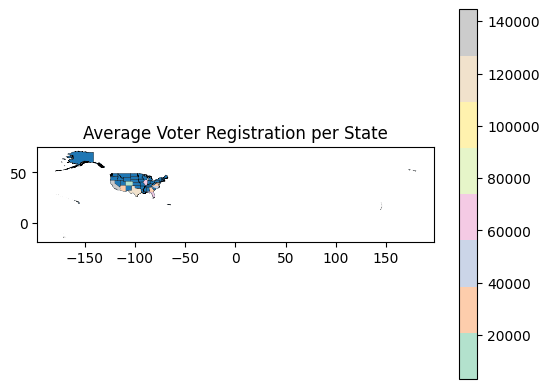

In [37]:
plt.figure(figsize = (25,15))
ax = states_US.plot(edgecolor = "black", linewidth = .25)
merge_plot = states_US.plot(column = 'registered_voters', ax = ax, legend = True, cmap = 'Pastel2')
legend_kwds = {'label': "Average Voter Registration"}
plt.title("Average Voter Registration per State")
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


Insights: The map and data revela that voter registration were higher in states with a notably hgiher population like California and Texas. Overall the more metropolis the city was like the higher the average number of new voters. Meanwhile more rural states have less voter registration. This notebook tells us that for future electuions they should concentrate on the states with lower than average voter registation for their campaigns like Georgia

Suggestions: Focus on rural states and utilize social media as some states during 2020 when they switched to online had better voter registration compared to 2016 as it may reach a younger audience. Overall perhaps adding different data points like demographic, economic status, or political views can provide a better understanding for voter registation patterns

Possible Next steps: I would work with local government to look deeper into the specific areas/zipcodes with low registration and perhaps compare it to a different demographic like economic status or ethnicity.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:
Jonathan Zheng

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Jonathan Zheng